# Elastic Particle Filtering

In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt

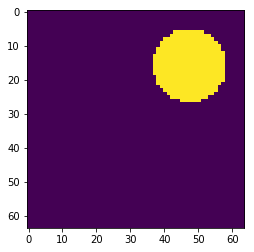

In [2]:
from cag.benchmark.circle import allocate_observations

theta_true, x_o = allocate_observations([.3, .5, .5], 1)

plt.imshow(x_o.squeeze().numpy())
plt.show()

In [3]:
class Regressor(torch.nn.Module):
    
    def __init__(self):
        super(Regressor, self).__init__()
        self._observation_dim = 64
        self._model = torch.nn.Sequential(
            torch.nn.Linear(self._observation_dim ** 2, 600),
            torch.nn.PReLU(),
            torch.nn.Linear(600, 300),
            torch.nn.PReLU(),
            torch.nn.Linear(300, 300),
            torch.nn.PReLU(),
            torch.nn.Linear(300, 3),
            torch.nn.Tanh()
        )
        
    def forward(self, x):
        x = x.view(-1, self._observation_dim ** 2)
        return self._model(x)
    
regressor = Regressor()

In [4]:
min = torch.tensor([-1, -1, -1]).float()
max = torch.tensor([1, 1, 1]).float()
initializer = torch.distributions.uniform.Uniform(min, max)

In [ ]:
from cag.benchmark.circle import CircleSimulator as Simulator
from cag.inference import ElasticParticleFiltering

simulator = Simulator()
epf = ElasticParticleFiltering(simulator, regressor)

In [ ]:
mean, std = epf.infer(x_o, initializer, num_steps=1000)

In [ ]:
print(mean)
print(std)

In [ ]:
from cag.benchmark.circle import allocate_observations

theta_true, x_inferred = allocate_observations(mean, 1)

plt.imshow(x_o.squeeze().numpy())
plt.show()
plt.imshow(x_inferred.squeeze().numpy())
plt.show()